# Phase 2: Subject Creation

**Description:**

This notebook is to act as the resulting summary file for the creation and upload of subjects for the IceCube Zooniverse project currently called *Name that Neutrino!*. The project is currently being maintained by Elizabeth Warrick (as of March 2023). In this notebook, we take the i3 file and run it through several filters. [note: describe more later].

> Nu Type: NuMu

> Run: 21971

> SubRun: 000219

### Summary Stats:

To be filled in after completing process. Also need to figure out global variables. 

**Subject Set Name:**

In [1]:
#Imports

#My functions: 
from uniformenergydist_filter import *

#General:
import numpy as np
import sys
import os
import subprocess
import argparse
import csv
from tables import *
import pandas as pd
from matplotlib import pyplot as plt
import h5py

#Zooniverse:
from panoptes_client import Panoptes, Project, SubjectSet, Subject
import magic
import glob

#IceCube:
from icecube.icetray import I3Units
import icecube.MuonGun
from icecube import dataio, dataclasses, icetray, MuonGun
from I3Tray import *
from icecube.hdfwriter import I3HDFWriter
from mc_labeler import MCLabeler #make sure that mc_labeler script is in current directory. 

In [2]:
#Specify file paths:

#Initial I3 File:
numu = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst'

#Desired output directory. Note that creation of this directory is not yet coded and is done manually. 
phase1_dir = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/'

In [3]:
#Run Filter 1 to label MC truth.
filter1(numu,phase1_dir)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/mc_labeler.py:523: UserWarning: Couldn't find OMKey in MCPESeriesMap
  warnings.warn("Couldn't find OMKey in MCPESeriesMap")


Note that the above cell might return an "exception" warning that the *MCPESeriesMap could not be found*. I am unsure why it does that because when I check the i3 file in dataio-shovel, I see the specified mc_pid_series_map (look at mc_labeler.py for exact name of specified key). The resulting file size should be around 400 MB. 

In [4]:
#Path of hdf from above filter.
numu_hdf = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/\
Phase1/mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst.hd5'

In [7]:
#Run uniformenergy_events function which requires hdf from filter 1, 
#number of bins, size of each random choice, and a random seed. 

uniformenergy_events(numu_hdf,25,40,12,subrun = True)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['binned_log10E'] = pd.cut(x = np.log10(df_filtered['energy']), bins = bins, labels = labels, include_lowest = True) #might throw an error?


Number of Bins: 25
Number of Events per Bin: 40
Total Number of Events: 1000
Initial Number of Events: 9201
Number of Events after filtering: 8520
Please input subrun number:
000219


The above function throws another warning about pd.cut, currently that is not a problem but I don't know if a new version of pandas will allow this. 

In [8]:
#Path to Random Events CSV
numu_csv = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/random_events_uniform_energy_distrib_21971_000219.csv'

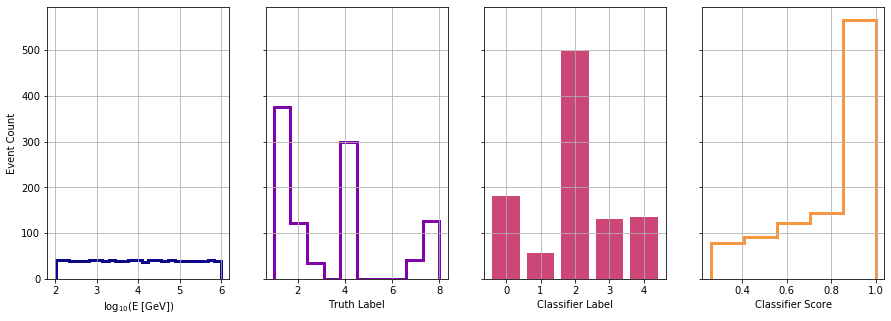

In [9]:
#Run event_characterization_plots function whick makes some quick 
#plots to get an idea of what data you're dealing with.
#Note that I want to update the plot types, maybe make a 2D histogram as Mike K suggested. 
#For truth labels, check out enums.py or in the .py file that holds the functions.

event_characterization_plots(numu_csv)

Now that we have the events for this phase chosen, we run the second filter to pick out only those events. 

In [10]:
#Path to i3 file from filter1 with MC truth labels. 
numu_filter1 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst'

In [11]:
#Run function to perform second filter which passes through only selected event IDs chosen from 
#the uniformenergy_events function. 
filter2(numu_filter1,phase1_dir,numu_csv)

In [12]:
#Path to i3 file from filter 2 that holds only specified events. 
numu_filter2 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst'

In [13]:
#Run function to perform third filter, which returns only the DAQ frames of the specified events.
#DAQ only file is then split up into many smaller i3 files since SteamShovel can't handle making videos of large
#i3 files at one time. Size limit is approx 2E6 MB (? unsure of units)
filter3(numu_filter2,21971_000219,phase1_dir)

In [14]:
#Path to NuMu Daq Only folder
numu_daq = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/'

In [15]:
get_steamshovel(numu_daq,21971000219)

List of files:
['/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0000_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst', '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0001_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst', '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0002_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst', '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0003_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst', '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0004_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst', '/home/ic

Finished Videos in: /home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0017_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst
Finished Videos in: /home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0018_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst
Finished Videos in: /home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0019_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst
Finished Videos in: /home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0020_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuMu.021971.000219.i3.zst
Finished Videos in: /home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971000219/daq_only-0021_uniform_energy_mc_label

Ideas for Compression:
- Use GUI to add files to queue and send to one compression folder.
- Add a subprocess line in movie script to compress the video after making it and direct it to save in the compression folder. 

In [16]:
compressed_path = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_21971000219/'

Can't get manifest yet since some subjects are missing and lining it up won't work. 

In [17]:
get_manifest(compressed_path, numu_csv)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_manifest = s3.to_dict('dict')


{'/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_21971000219/compressed_run_21971_event_12873_origidx_31_RF22.mp4': {'event': 12873,
  'run': 21971,
  'truth_classification': 4,
  'pred_skim': 0.3963308036327362,
  'pred_cascade': 0.1063742488622665,
  'pred_tgtrack': 0.2546086311340332,
  'pred_starttrack': 0.0292168632149696,
  'pred_stoptrack': 0.2134694308042526,
  'energy': 139100.4392915148,
  'zenith': 0.9968220501656708,
  'oneweight': 317395381642746.06,
  'truth_classification_label': 'skimming_track',
  'max_score_val': 0.3963308036327362,
  'idx_max_score': 'pred_skim',
  'binned_log10E': 20},
 '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_21971000219/compressed_run_21971_event_25622_origidx_25_RF22.mp4': {'event': 25622,
  'run': 21971,
  'truth_classification': 4,
  'pred_skim': 0.2425440698862075,
  'pred_cascade': 0.0940922796726226,
  'pred_tgtrack': 0.4970952272415161,
  'pred_star

In [18]:
make_subject_set('numu_run_21971_subrun_000219_phase2')

Subject Set Name: numu_run_21971_subrun_000219_phase2
Subject Set ID: 112433
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112392>, <SubjectSet 112414>, <SubjectSet 112418>, <SubjectSet 112119>, <SubjectSet 112116>, <SubjectSet 112118>, <SubjectSet 112120>, <SubjectSet 112109>, <SubjectSet 112391>, <SubjectSet 112425>]


In [19]:
uploader(compressed_path,numu_csv,112433)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:468: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_manifest = s3.to_dict('dict')


Confirm if subject set 112433 is listed below.
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112392>, <SubjectSet 112414>, <SubjectSet 112418>, <SubjectSet 112119>, <SubjectSet 112116>, <SubjectSet 112118>, <SubjectSet 112120>, <SubjectSet 112109>, <SubjectSet 112391>, <SubjectSet 112425>]
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112392>, <SubjectSet 112414>, <SubjectSet 112418>, <SubjectSet 112119>, <SubjectSet 112116>, <SubjectSet 112118>, <SubjectSet 112120>, <SubjectSet 112109>, <SubjectSet 112391>, <SubjectSet 112425>]
Number of times loop has ran: 1
Number of times loop has ran: 2
Number of times loop has ran: 3
Number of times loop has ran: 4
Number of times loop has ran: 5
Number of times loop has ran: 6
Number of times loop has ran: 7
Number of times loop has ran: 8
Number of times loop ha

Number of times loop has ran: 224
Number of times loop has ran: 225
Number of times loop has ran: 226
Number of times loop has ran: 227
Number of times loop has ran: 228
Number of times loop has ran: 229
Number of times loop has ran: 230
Number of times loop has ran: 231
Number of times loop has ran: 232
Number of times loop has ran: 233
Number of times loop has ran: 234
Number of times loop has ran: 235
Number of times loop has ran: 236
Number of times loop has ran: 237
Number of times loop has ran: 238
Number of times loop has ran: 239
Number of times loop has ran: 240
Number of times loop has ran: 241
Number of times loop has ran: 242
Number of times loop has ran: 243
Number of times loop has ran: 244
Number of times loop has ran: 245
Number of times loop has ran: 246
Number of times loop has ran: 247
Number of times loop has ran: 248
Number of times loop has ran: 249
Number of times loop has ran: 250
Number of times loop has ran: 251
Number of times loop has ran: 252
Number of time

Number of times loop has ran: 465
Number of times loop has ran: 466
Number of times loop has ran: 467
Number of times loop has ran: 468
Number of times loop has ran: 469
Number of times loop has ran: 470
Number of times loop has ran: 471
Number of times loop has ran: 472
Number of times loop has ran: 473
Number of times loop has ran: 474
